In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import keras
import keras.backend as K
import tensorflow as tf

print("Keras Version", keras.__version__)
print("tensorflow Version", tf.__version__)
print("dim_ordering:", K.image_dim_ordering())

Using TensorFlow backend.


Keras Version 2.2.4
tensorflow Version 1.9.0
dim_ordering: tf


In [3]:
import numpy as np

from keras.models import load_model
from keras.preprocessing import image
from keras import models
from matplotlib import cm

In [4]:
model = load_model("11.VGG19-ISBI19-Model.h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [5]:
img_path = 'data-ISBI/UID_43_10_3_all.jpg'
# img_path = 'data/train/normal/RB_RC_UID_H19_21_1_hem.jpg'

# We preprocess the image into a 4D tensor
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


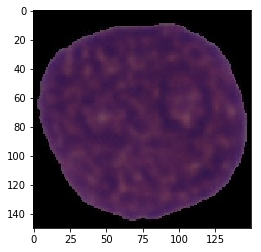

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [7]:
layer_outputs = [layer.output for layer in model.layers[2:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [8]:
activations = activation_model.predict(img_tensor)

In [9]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 150, 150, 64)


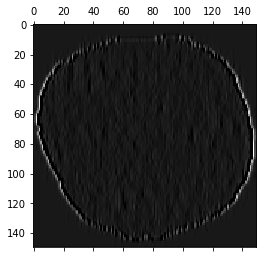

In [10]:
plt.matshow(first_layer_activation[0, :, :, 35], cmap='gray')
plt.show()

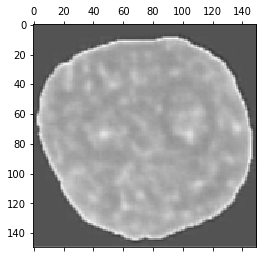

In [11]:
plt.matshow(first_layer_activation[0, :, :, 25], cmap='gray')
plt.show()

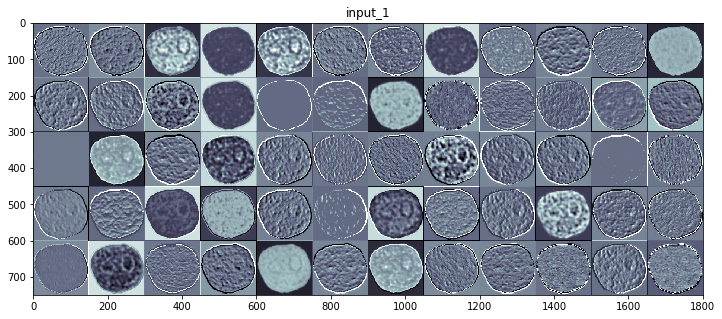

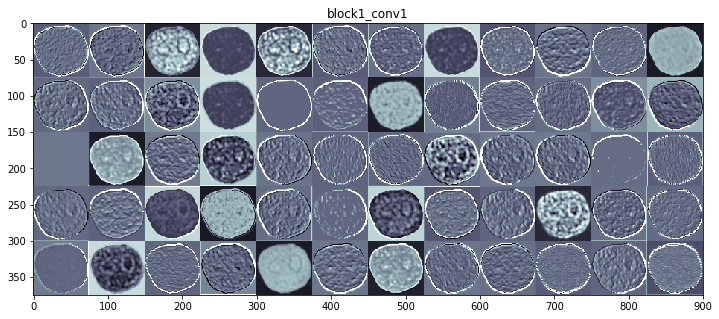

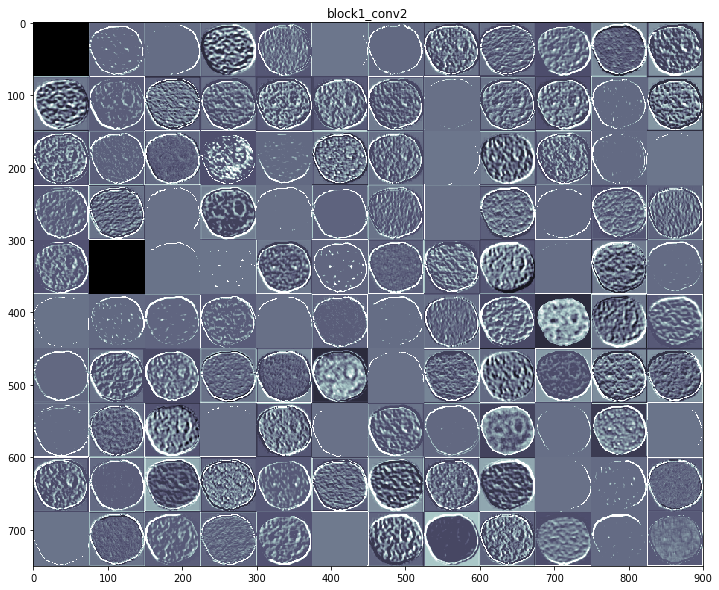

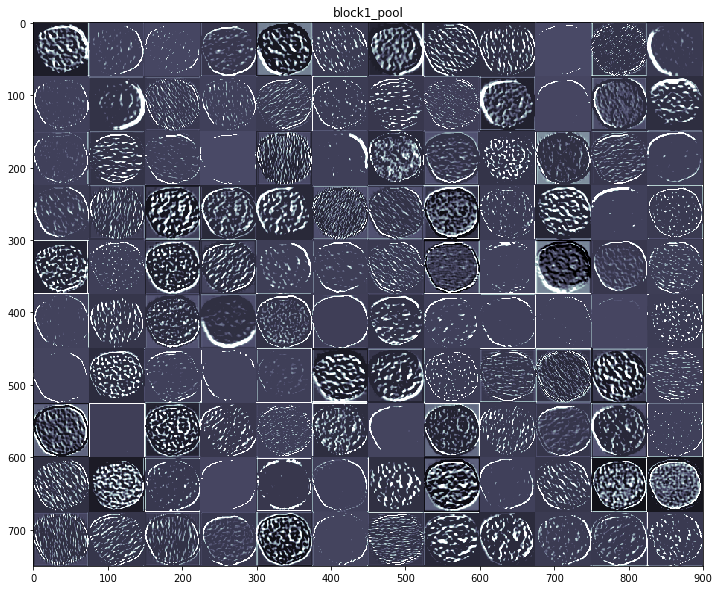

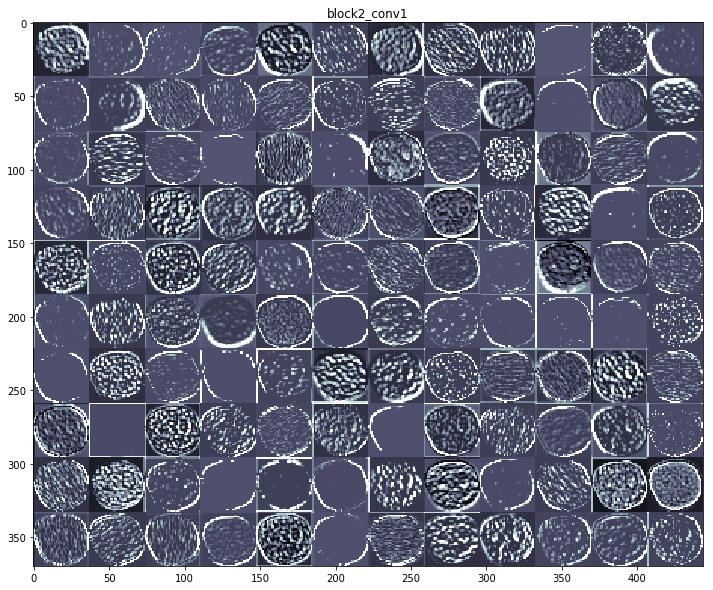

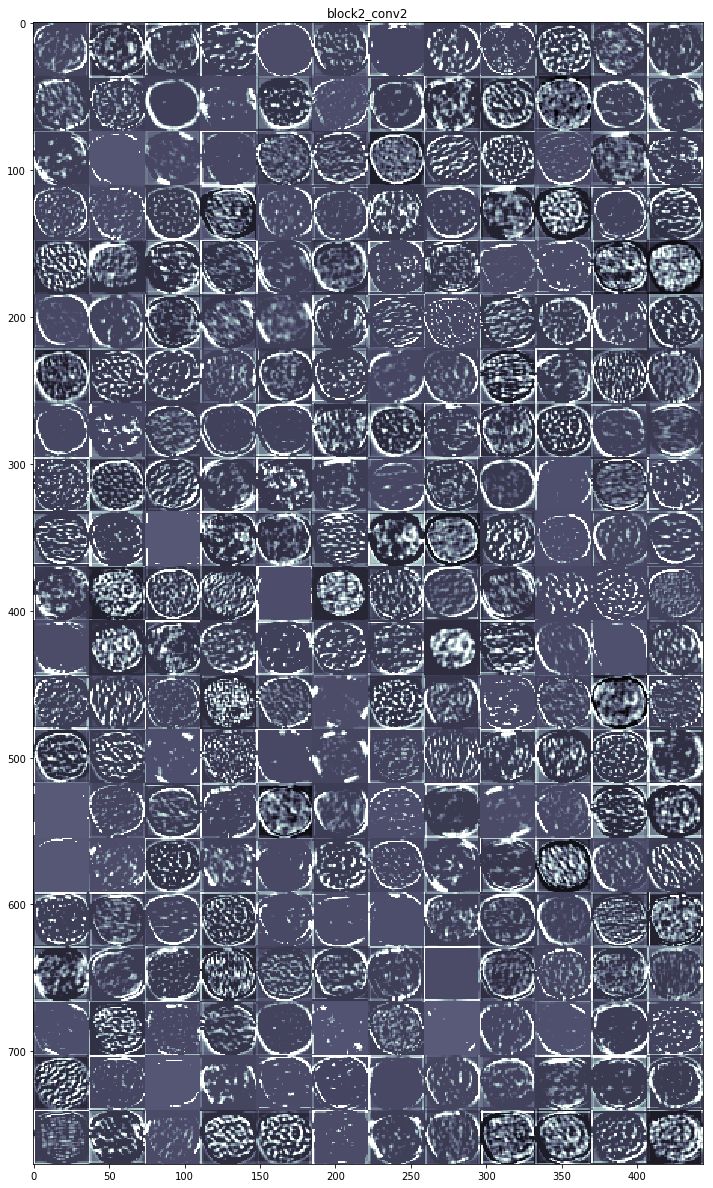

In [14]:
layer_names = []
for layer in model.layers[:45]:
    layer_names.append(layer.name)

images_per_row = 12

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
   
    
    plt.title(layer_name)
    plt.grid(False)
    
    plt.imshow(display_grid, aspect='auto', cmap=cm.bone)
    plt.savefig('activation_functions/MalignantRB_RC_UID_20_13_2_all_activation_' + layer_name +'.png', bbox_inches='tight', dpi = 100)
plt.show()